## Importing necessary libraries

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt

### Loading the dataset

In [346]:
df1 = pd.read_csv('log_mini.csv')
df2 = pd.read_csv('tf_mini.csv')

In [347]:
df1.shape, df2.shape

((167880, 21), (50704, 30))

In [348]:
# Renaming the column track id
df1 = df1.rename(columns={'track_id_clean':'track_id'})

In [349]:
# merging the two dataset
df = pd.merge(df1, df2, on='track_id')

In [350]:
df.head(2)

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,True,False,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [351]:
df["skipped"] = df["skip_1"]*df["skip_2"]*df["skip_3"]
df.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

In [352]:
df['date'] = pd.to_datetime(df['date'])

In [353]:
# extract year, month, day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [354]:
df.drop('date',axis=1, inplace=True)

In [355]:
df.drop(['session_id','track_id'],axis=1,inplace=True)

In [356]:
df.head()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,year,month,day
0,1,20,0,0,0,0,0,0,True,16,...,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False,2018,7,15
1,7,12,0,0,1,1,0,0,False,17,...,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False,2018,7,15
2,6,20,0,0,1,1,0,0,False,21,...,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False,2018,7,14
3,9,13,0,1,0,0,0,0,False,18,...,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False,2018,7,15
4,7,12,0,0,1,1,0,0,True,19,...,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,False,2018,7,14


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_position                 167880 non-null  int64  
 1   session_length                   167880 non-null  int64  
 2   context_switch                   167880 non-null  int64  
 3   no_pause_before_play             167880 non-null  int64  
 4   short_pause_before_play          167880 non-null  int64  
 5   long_pause_before_play           167880 non-null  int64  
 6   hist_user_behavior_n_seekfwd     167880 non-null  int64  
 7   hist_user_behavior_n_seekback    167880 non-null  int64  
 8   hist_user_behavior_is_shuffle    167880 non-null  bool   
 9   hour_of_day                      167880 non-null  int64  
 10  premium                          167880 non-null  bool   
 11  context_type                     167880 non-null  object 
 12  hi

In [358]:
df.isnull().sum()

session_position                   0
session_length                     0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
danceability                       0
dyn_range_mean                     0
energy                             0
flatness                           0
instrumentalness                   0
key                                0
liveness                           0
l

In [359]:
lst = []
binary_cols = []
for i in df.columns:
    if len(df[i].unique()) <= 2:
        binary_cols.append(i)        
    elif len(df[i].unique()) <= 80:
        print('{} has total unique values:{} \nThey are {}'.format(i, len(df[i].unique()), df[i].unique()))
        lst.append(i)
        print()

session_position has total unique values:20 
They are [ 1  7  6  9  8  2 13  5 16 14  4 19  3 10 17 12 15 20 18 11]

session_length has total unique values:11 
They are [20 12 13 19 11 15 16 10 17 18 14]

hist_user_behavior_n_seekfwd has total unique values:25 
They are [ 0  1  3  4  6  2  5 10 14  7 16 25  8 29  9 38 20 24 23 12 15 19 60 11
 22]

hist_user_behavior_n_seekback has total unique values:30 
They are [  0   1   2  10  21   6   4   5   3   8   7  20  13  14  15  34  52   9
  73  55 151  11  23  12  53  17  16  26  43  18]

hour_of_day has total unique values:24 
They are [16 17 21 18 19 11 15  3 23  9  0 14 22 20 13 10  5 12  7  2  1  6  4  8]

context_type has total unique values:6 
They are ['editorial_playlist' 'user_collection' 'catalog' 'radio' 'charts'
 'personalized_playlist']

hist_user_behavior_reason_start has total unique values:9 
They are ['trackdone' 'fwdbtn' 'appload' 'playbtn' 'clickrow' 'backbtn' 'remote'
 'endplay' 'trackerror']

hist_user_behavior_reason_

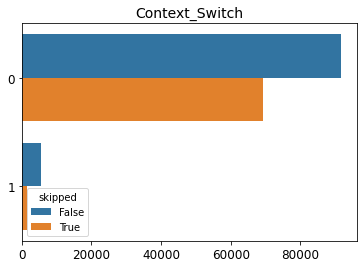

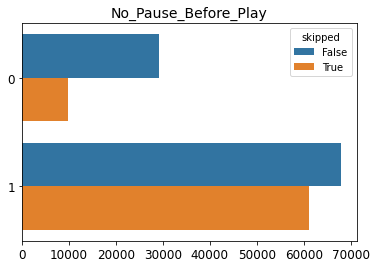

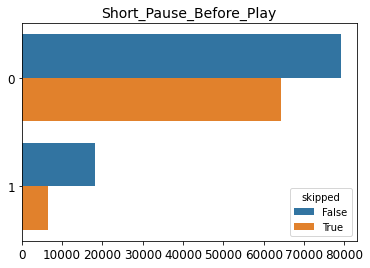

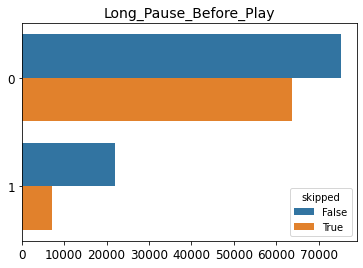

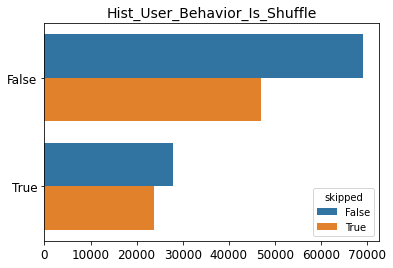

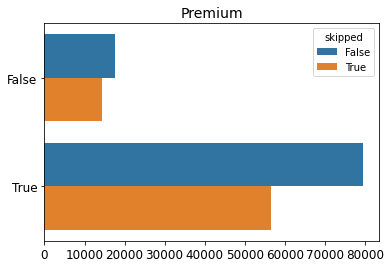

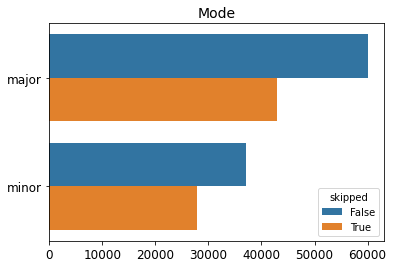

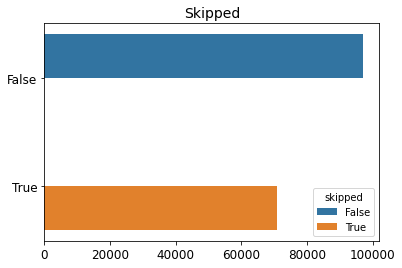

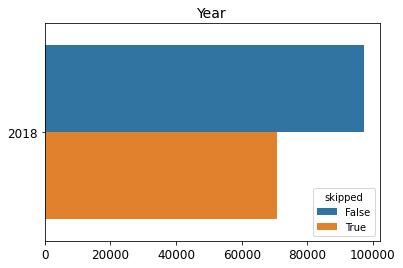

In [360]:
for i in binary_cols:
    sns.countplot(y=i,data=df, hue='skipped')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

## Observations
1. The count of context switch is very less which means people generelly do not change contexts while listening

2. The songs which don't have pause before play are generally skipped as compared to the songs which have pause

3. maximum songs have short and long pause before play

4. Historical behaviour data indicates that the users do not use shuffle mode much.

5. Maximum users use premium version

6. Maximum songs are from major mode


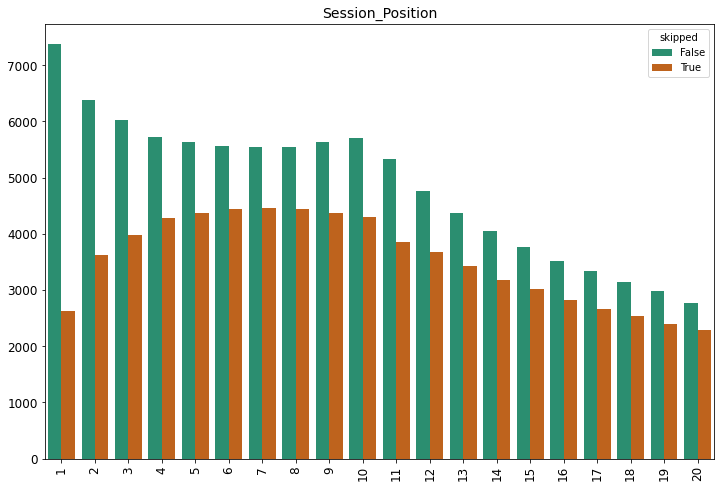

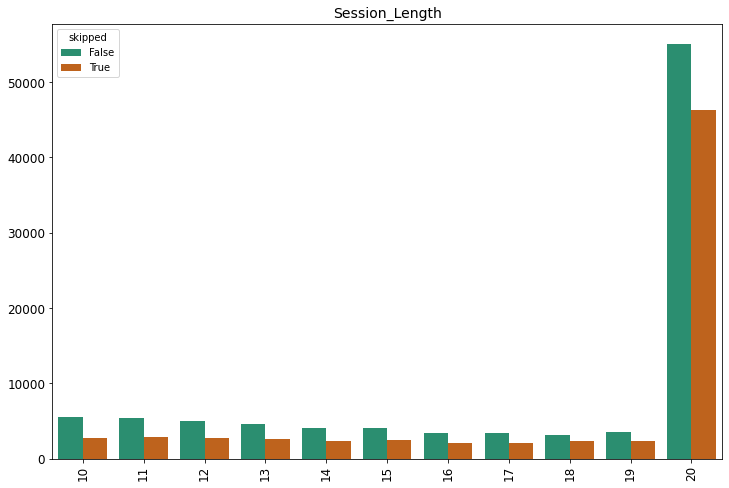

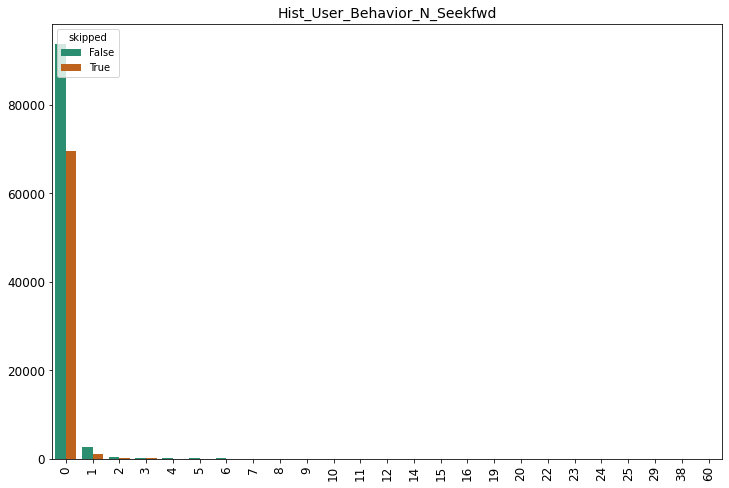

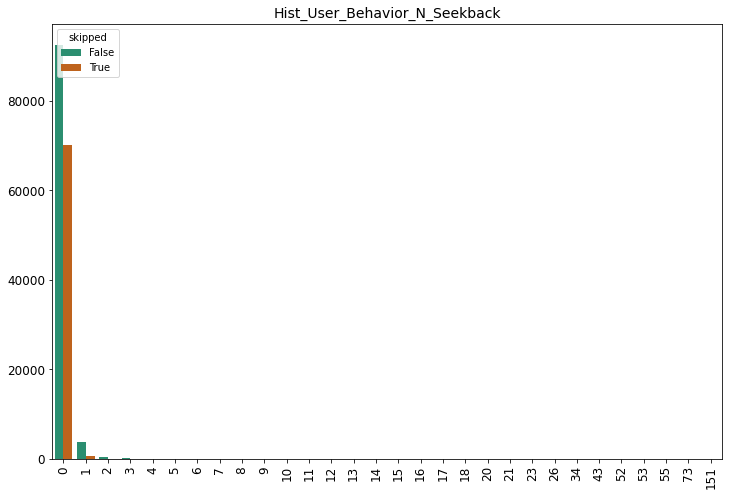

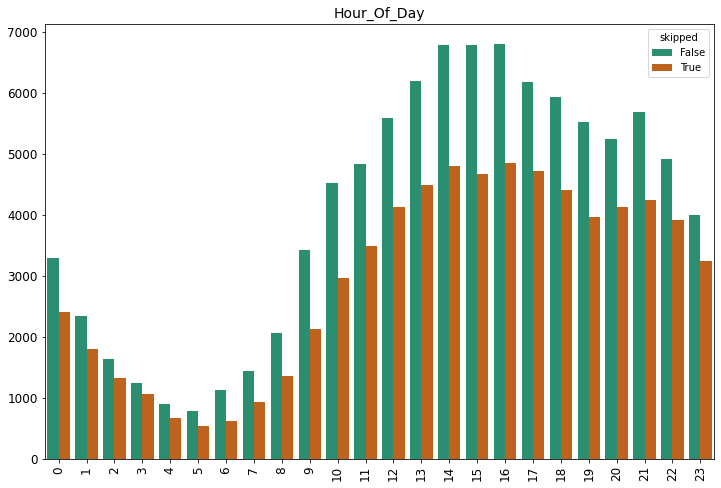

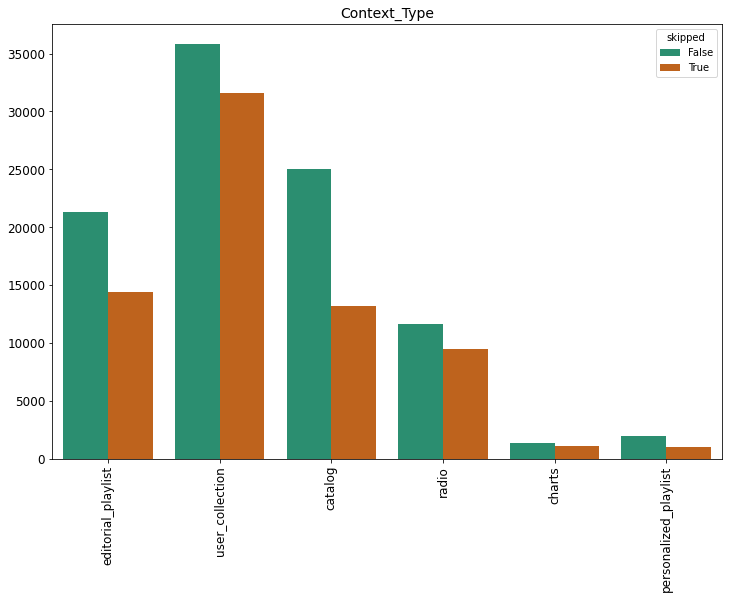

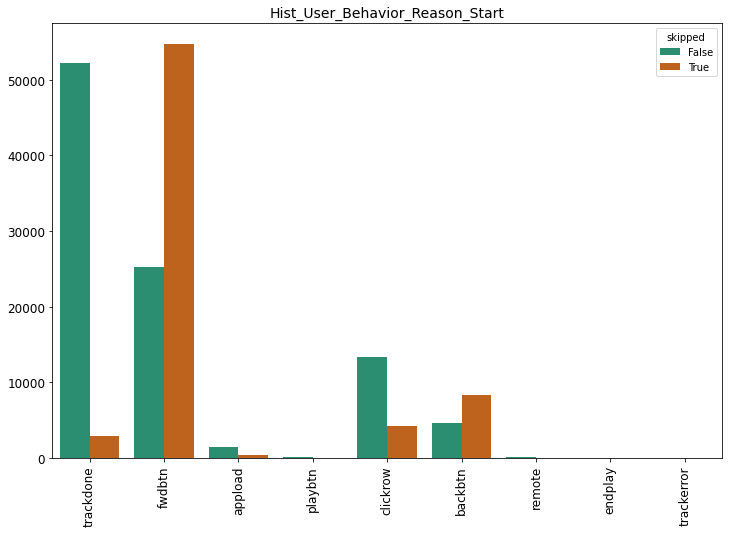

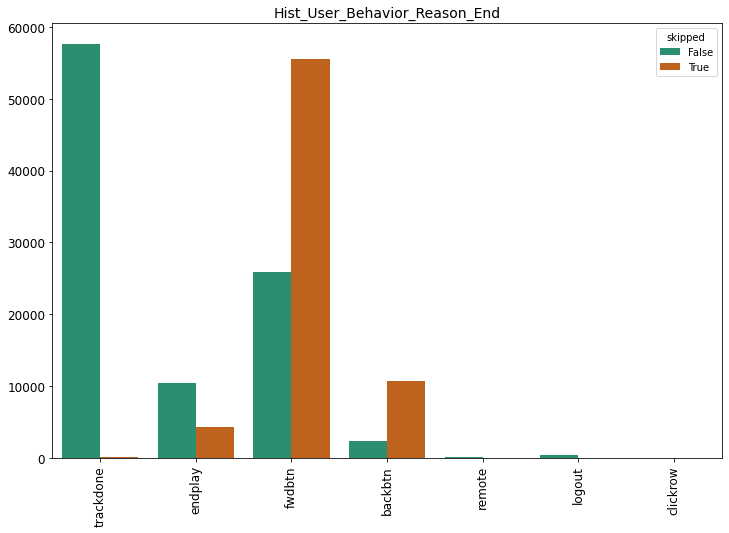

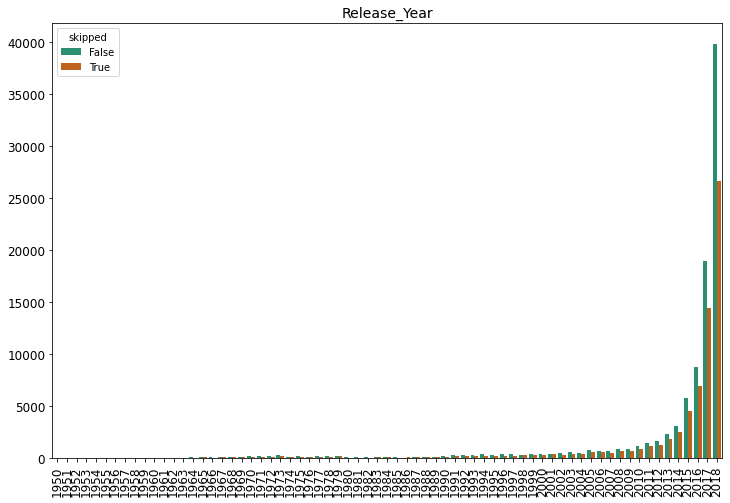

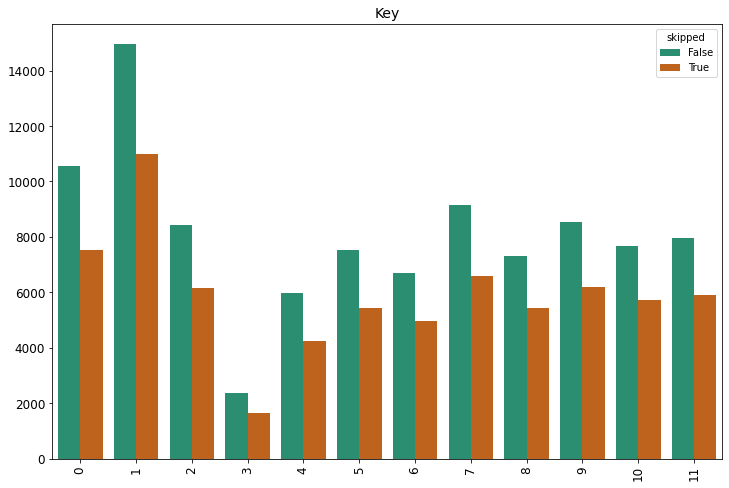

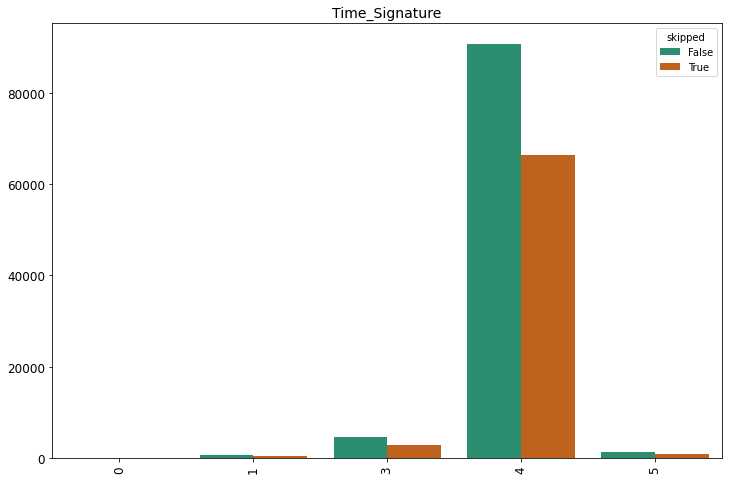

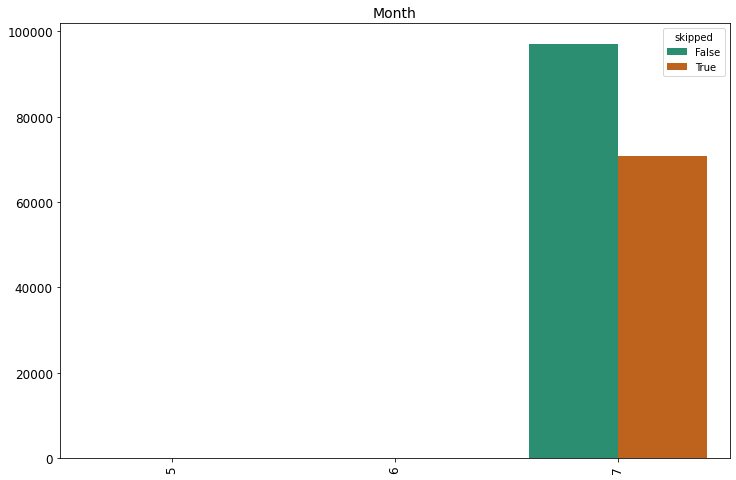

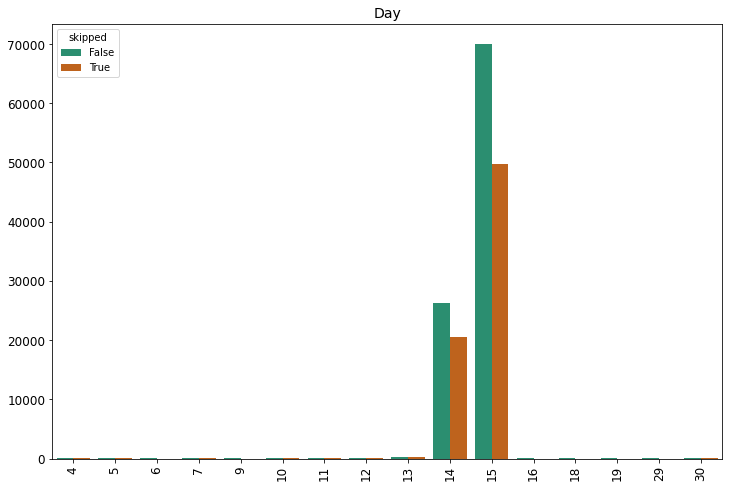

In [361]:
for i in lst:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i, data=df, hue='skipped', palette='Dark2')
    plt.xticks(rotation=90)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(i.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    

## Observations
1. Maximum songs are present in the first three sessions and minimum in last three sessions. And the songs belonging to 1st session are skipped least as compared to others.


2. Maximum skips happened for those songs which are present in the sessions starting from session 4 upto session 10 then no of skips decreased along with the no of songs.


3. Maximum count of sessions length is 20 which means users generally listen to music for 20 mins


4. The users do not seek forward or backward through the song


5. The users do not listen to music much at late nights or early in the morning. The peak listening hours are 1pm to 5pm in the afternoon


6. Maximum songs were listened in 15-07-2018


7. The maximum number of songs fall under the context user_collection. But songs present in editorial_playlist and catalog are less skipped as compared to user_collection.


8. The 'trackdone' category has maximum no of songs that are not skipped after playing and 'fwdbtn' category has most songs skipped. It indicates that the users skipped the song when they try to play the songs by forward option but they didn't skip when the songs are played in general order.


9.  Maximum songs are released in 2018


10. Maximum songs fall under the category key-1 and minimum under the category key-3


11. The most common time signature in music is 4/4



In [362]:
histogram_cols = ['acousticness','beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
       'energy', 'flatness', 'instrumentalness', 'liveness', 'loudness','mechanism',
       'organism', 'speechiness', 'tempo', 'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7']

### Outlier Detection

******************** acousticness ********************


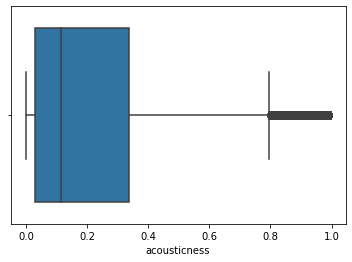

lower limit for outliers: -0.42890213709324615
upper limit for outliers: 0.7963804649189116
total number of outliers in acousticness is 7463

******************** beat_strength ********************


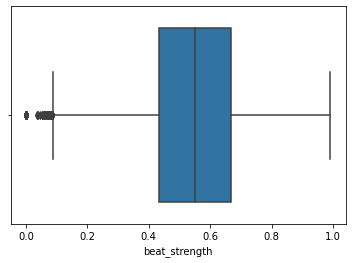

lower limit for outliers: 0.0861710496246812
upper limit for outliers: 1.0138866789638998
total number of outliers in beat_strength is 120

******************** bounciness ********************


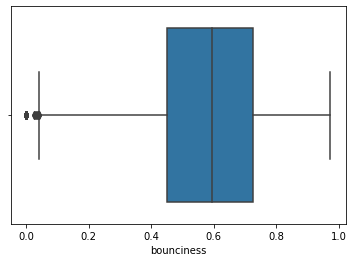

lower limit for outliers: 0.04303647577762604
upper limit for outliers: 1.1332653909921646
total number of outliers in bounciness is 45

******************** danceability ********************


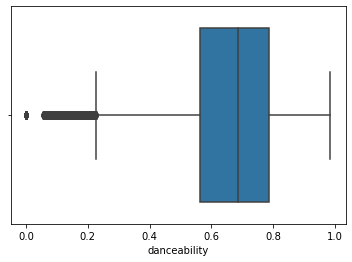

lower limit for outliers: 0.22597152739763232
upper limit for outliers: 1.1229798868298533
total number of outliers in danceability is 1311

******************** dyn_range_mean ********************


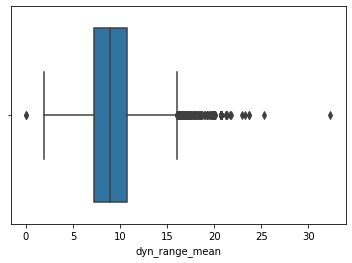

lower limit for outliers: 1.91421568393707
upper limit for outliers: 16.075128197669983
total number of outliers in dyn_range_mean is 743

******************** energy ********************


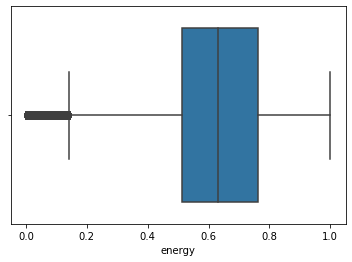

lower limit for outliers: 0.1430390626192093
upper limit for outliers: 1.1314980536699295
total number of outliers in energy is 1660

******************** flatness ********************


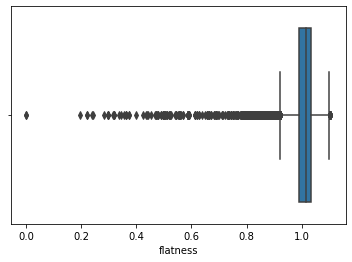

lower limit for outliers: 0.92215472459793
upper limit for outliers: 1.1006868481636056
total number of outliers in flatness is 4730

******************** instrumentalness ********************


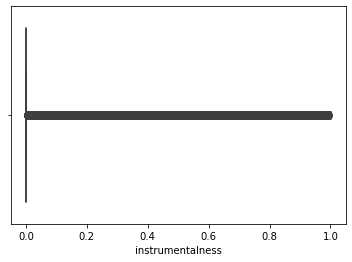

lower limit for outliers: -0.0001470273652599552
upper limit for outliers: 0.0002450554801023408
total number of outliers in instrumentalness is 36170

******************** liveness ********************


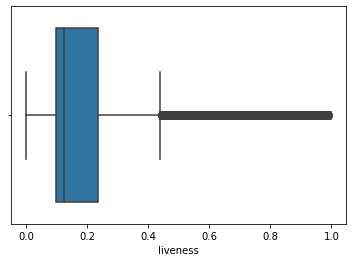

lower limit for outliers: -0.10397185012698186
upper limit for outliers: 0.43979986384511005
total number of outliers in liveness is 10369

******************** loudness ********************


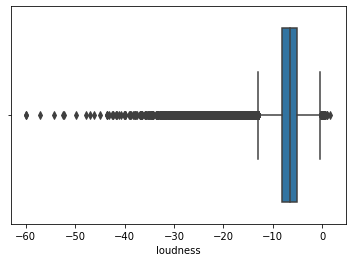

lower limit for outliers: -12.955500602722164
upper limit for outliers: -0.3594999313354519
total number of outliers in loudness is 7220

******************** mechanism ********************


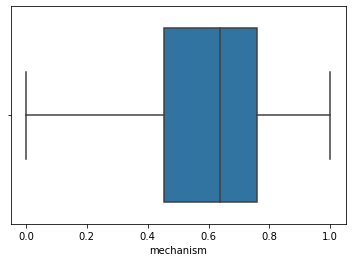

lower limit for outliers: -0.004240110516548323
upper limit for outliers: 1.215044066309929
total number of outliers in mechanism is 0

******************** organism ********************


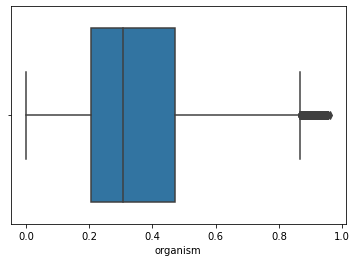

lower limit for outliers: -0.19232356548309315
upper limit for outliers: 0.8675504922866819
total number of outliers in organism is 1577

******************** speechiness ********************


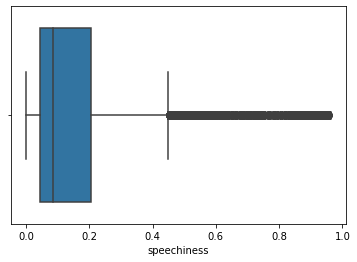

lower limit for outliers: -0.19760443037375802
upper limit for outliers: 0.4483680562116204
total number of outliers in speechiness is 4928

******************** tempo ********************


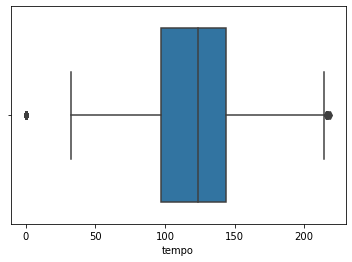

lower limit for outliers: 26.402996063232422
upper limit for outliers: 214.67499923706055
total number of outliers in tempo is 53

******************** valence ********************


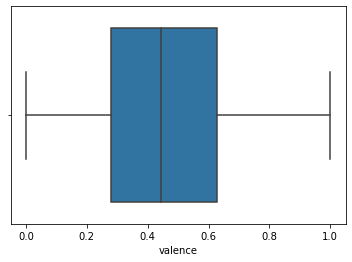

lower limit for outliers: -0.23928359150886552
upper limit for outliers: 1.1457092463970184
total number of outliers in valence is 0

******************** acoustic_vector_0 ********************


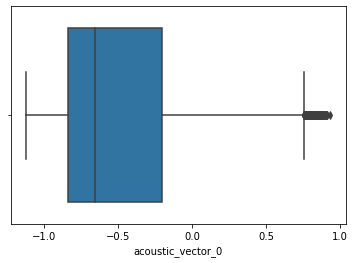

lower limit for outliers: -1.7993178032338621
upper limit for outliers: 0.7546333707869056
total number of outliers in acoustic_vector_0 is 215

******************** acoustic_vector_1 ********************


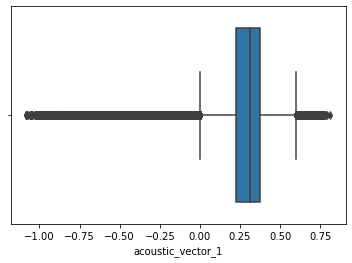

lower limit for outliers: 0.002450756728649167
upper limit for outliers: 0.5981901809573172
total number of outliers in acoustic_vector_1 is 16875

******************** acoustic_vector_2 ********************


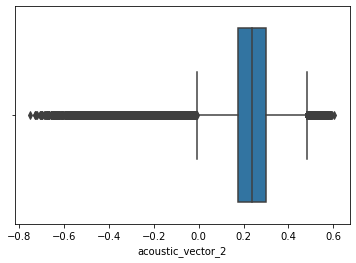

lower limit for outliers: -0.010009853169322153
upper limit for outliers: 0.48308964259922516
total number of outliers in acoustic_vector_2 is 19021

******************** acoustic_vector_3 ********************


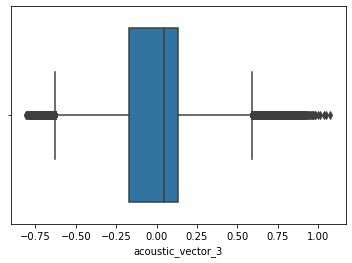

lower limit for outliers: -0.6279347911477087
upper limit for outliers: 0.5917838439345358
total number of outliers in acoustic_vector_3 is 6420

******************** acoustic_vector_4 ********************


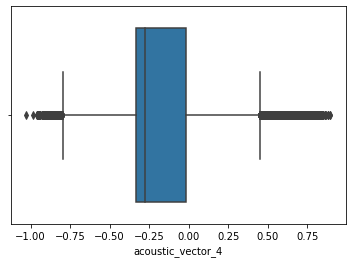

lower limit for outliers: -0.7979631889611483
upper limit for outliers: 0.4483757000416518
total number of outliers in acoustic_vector_4 is 14455

******************** acoustic_vector_5 ********************


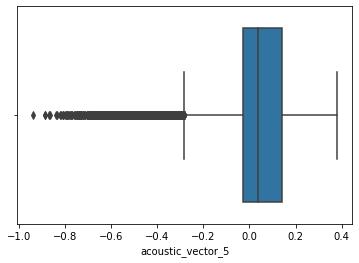

lower limit for outliers: -0.28435334190726264
upper limit for outliers: 0.3937545754015444
total number of outliers in acoustic_vector_5 is 1640

******************** acoustic_vector_6 ********************


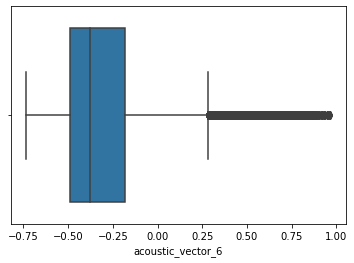

lower limit for outliers: -0.9534930754452945
upper limit for outliers: 0.28303107433021085
total number of outliers in acoustic_vector_6 is 11304

******************** acoustic_vector_7 ********************


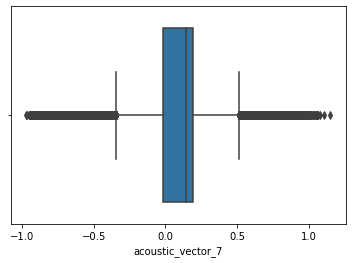

lower limit for outliers: -0.34344582795165457
upper limit for outliers: 0.5170699658337978
total number of outliers in acoustic_vector_7 is 20848



In [363]:
for i in histogram_cols:
    print('*'*20,i,'*'*20)
    sns.boxplot(df[i])
    plt.show()
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3 - q1
    lw_lm = q1 - 1.5*iqr
    up_lm = q3 + 1.5*iqr
    print('lower limit for outliers:',lw_lm)
    print('upper limit for outliers:',up_lm)
    print('total number of outliers in {} is {}'.format(i,len(df[i][df[i]>up_lm]) + len(df[i][df[i]<lw_lm])))
    print()

### Outlier capping

In [364]:
for i in histogram_cols:
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3 - q1
    lw_lm = q1 - 1.5*iqr
    up_lm = q3 + 1.5*iqr
    df[i] = np.where(df[i]>up_lm, up_lm, np.where(df[i]<lw_lm, lw_lm, df[i]))

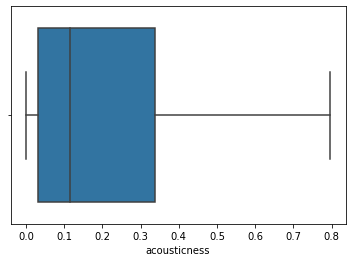

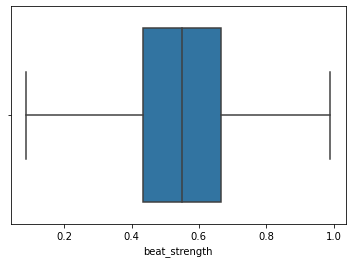

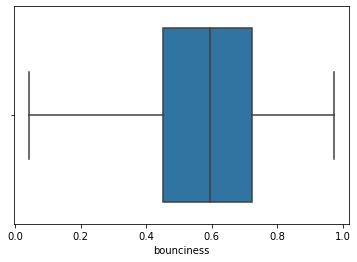

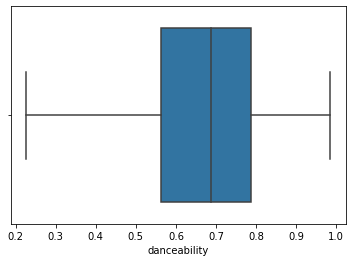

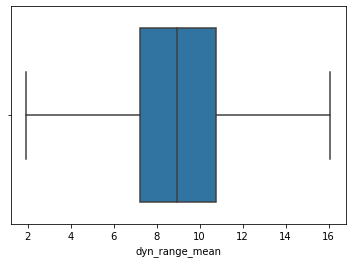

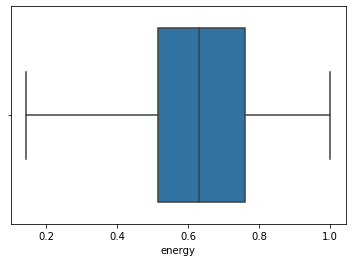

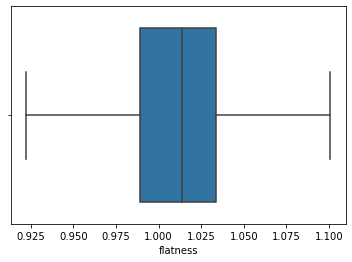

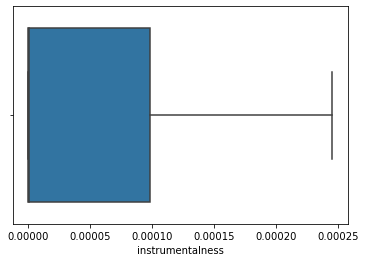

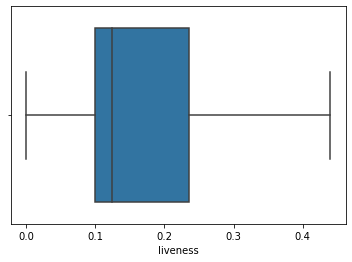

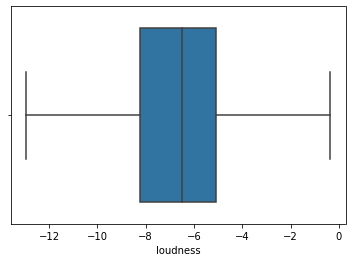

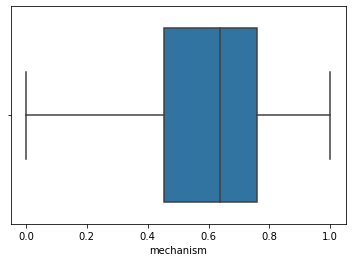

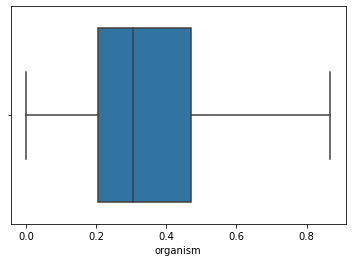

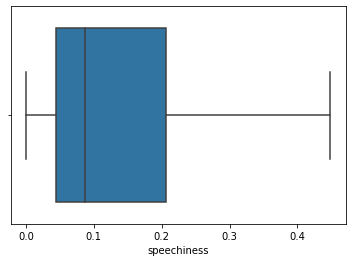

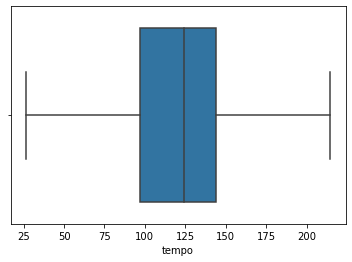

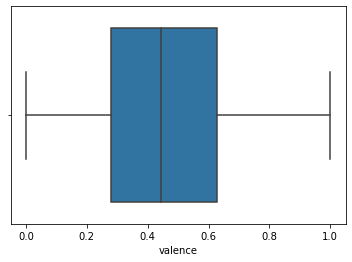

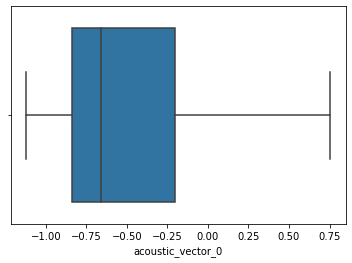

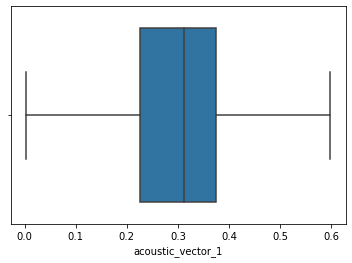

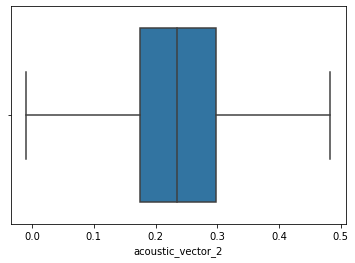

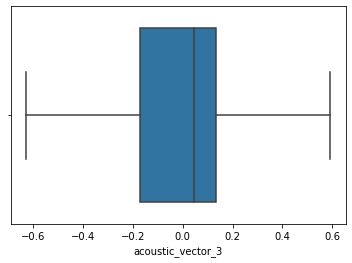

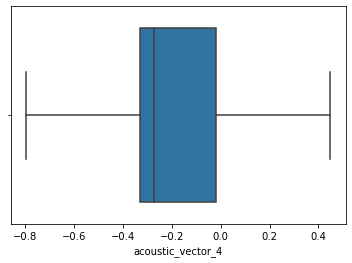

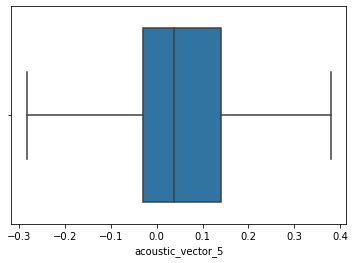

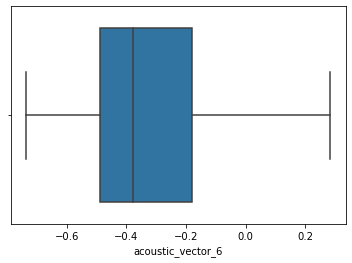

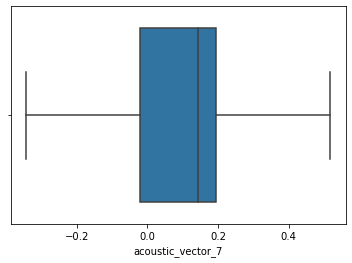

In [365]:
for i in histogram_cols:
    sns.boxplot(df[i])
    plt.show()

 - After outlier capping we can see the outliers have been replaced by threshold values.

## Conclusion of EDA


 - The songs which don't have pause before play are generally skipped as compared to the songs which have pause so the song app should provide a pause before songs as it will allow the listener to process the content and comprehend the structure of the music. Without pauses and silences, music will turn monotonous.
 
 
 - Songs present in first three sessions are skipped less so this session positions can also be used as a means for the popularity or commercial success of a particular track.
 
 
 - As the peak listening hours are from 1pm to 5pm in the afternoon so this time period can also be used for promoting new songs
 
 
 - Maximum songs are listened on day 15 of each month followed by day 14. People may be more likely to listen to music on weekends or days off from work, and the 15th of each month happens to fall around the middle of most people's pay periods
 

## One-Hot-Encoding

In [366]:
df = pd.get_dummies(df,columns=['context_type','hist_user_behavior_reason_start','hist_user_behavior_reason_end'])

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   session_position                            167880 non-null  int64  
 1   session_length                              167880 non-null  int64  
 2   context_switch                              167880 non-null  int64  
 3   no_pause_before_play                        167880 non-null  int64  
 4   short_pause_before_play                     167880 non-null  int64  
 5   long_pause_before_play                      167880 non-null  int64  
 6   hist_user_behavior_n_seekfwd                167880 non-null  int64  
 7   hist_user_behavior_n_seekback               167880 non-null  int64  
 8   hist_user_behavior_is_shuffle               167880 non-null  bool   
 9   hour_of_day                                 167880 non-null  int64  
 

## Label Encoding

In [368]:
encoder = LabelEncoder()

In [369]:
df['mode'] = encoder.fit_transform(df['mode'])

In [370]:
df.head(2)

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1,20,0,0,0,0,0,0,True,16,...,0,1,0,0,0,0,0,0,0,1
1,7,12,0,0,1,1,0,0,False,17,...,0,0,0,0,0,1,0,0,0,0


### Feature selection

In [371]:
from sklearn.feature_selection import mutual_info_regression

In [372]:
X = df.drop('skipped', axis=1)
y = df['skipped']

In [373]:
def make_mi_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_regression(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [374]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [375]:
mi_scores = make_mi_scores(X, y)

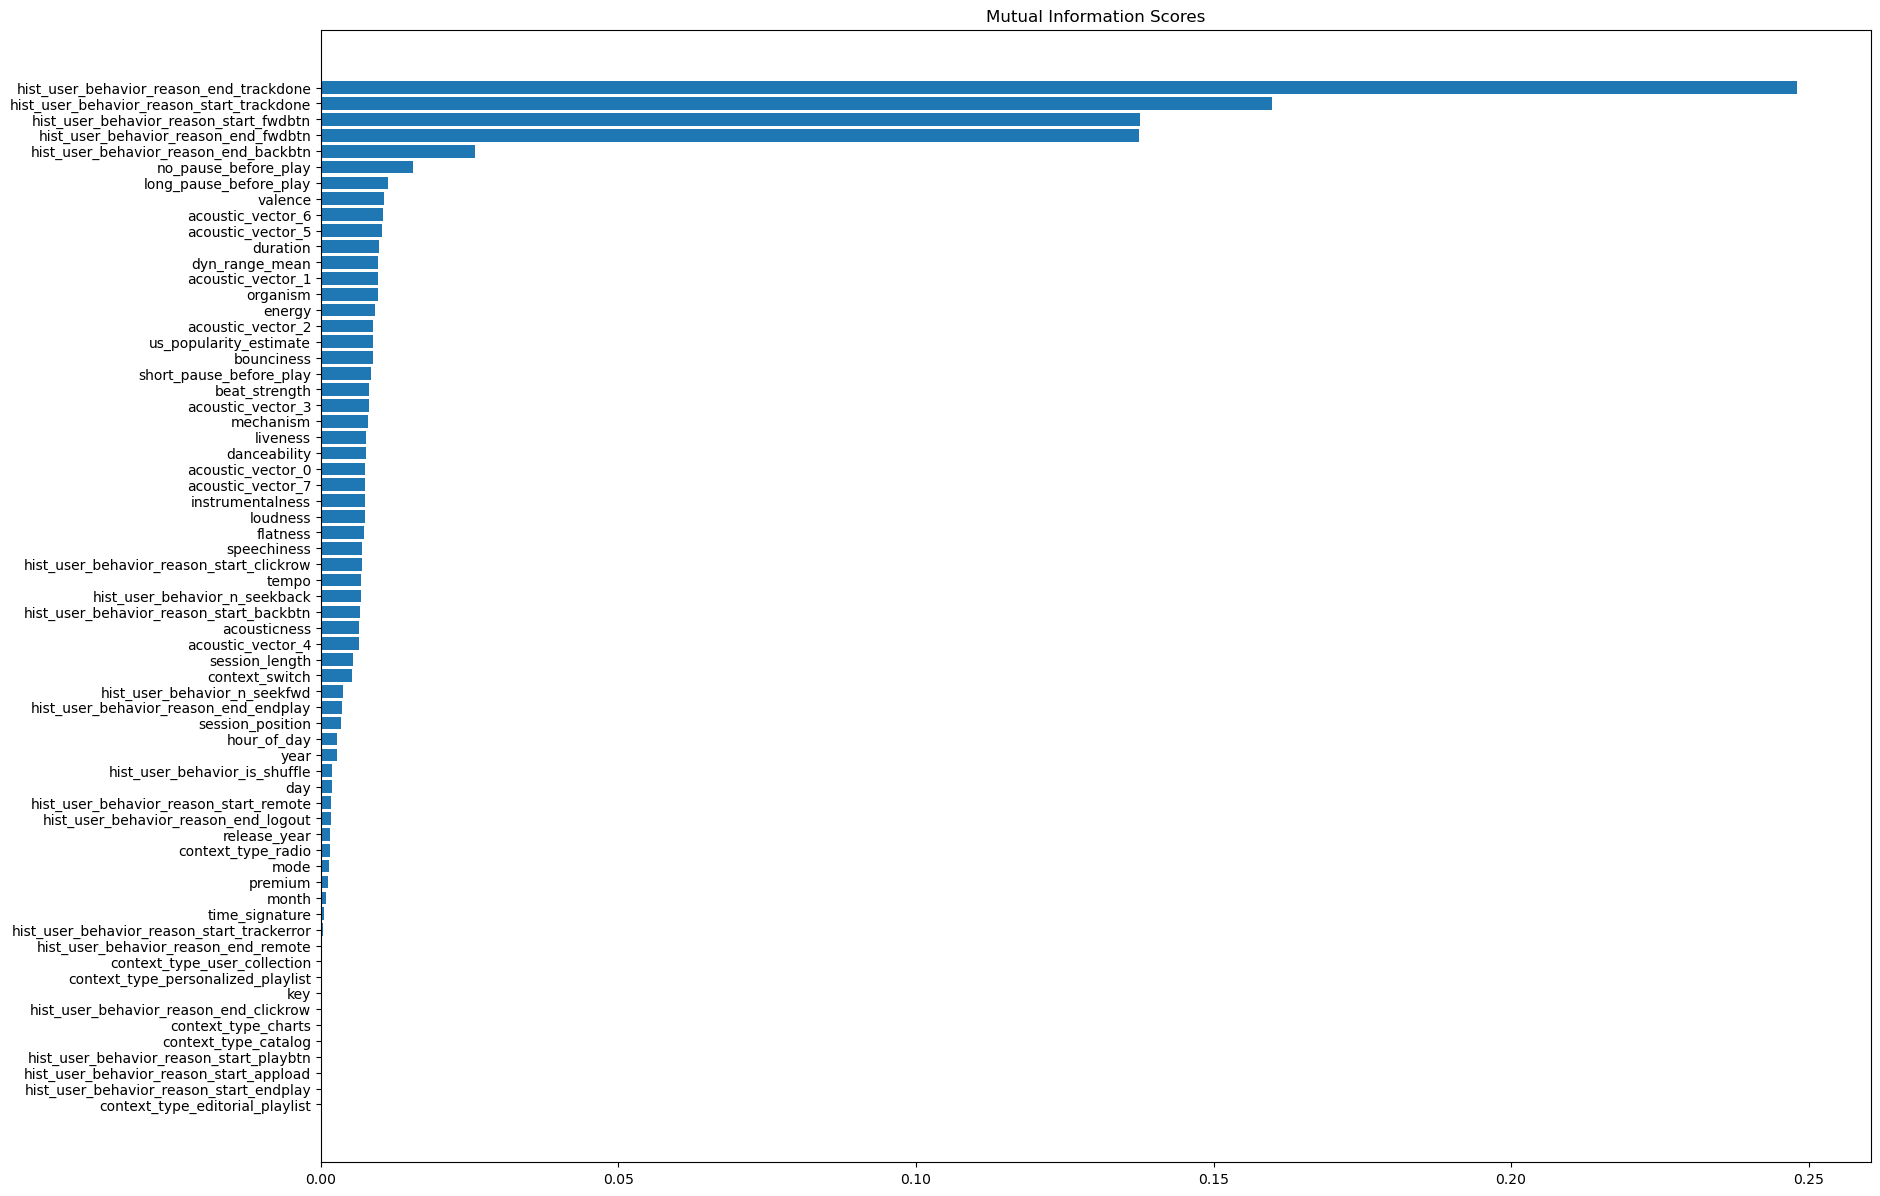

In [376]:
plt.figure(dpi=100, figsize=(20,15))
plot_mi_scores(mi_scores)

In [377]:
mi_scores[:20]

hist_user_behavior_reason_end_trackdone      0.248083
hist_user_behavior_reason_start_trackdone    0.159897
hist_user_behavior_reason_start_fwdbtn       0.137652
hist_user_behavior_reason_end_fwdbtn         0.137410
hist_user_behavior_reason_end_backbtn        0.025899
no_pause_before_play                         0.015524
long_pause_before_play                       0.011225
valence                                      0.010522
acoustic_vector_6                            0.010429
acoustic_vector_5                            0.010273
duration                                     0.009729
dyn_range_mean                               0.009636
acoustic_vector_1                            0.009596
organism                                     0.009546
energy                                       0.008998
acoustic_vector_2                            0.008714
us_popularity_estimate                       0.008695
bounciness                                   0.008685
short_pause_before_play     

In [378]:
features = mi_scores[:20].index.tolist()

In [379]:
features

['hist_user_behavior_reason_end_trackdone',
 'hist_user_behavior_reason_start_trackdone',
 'hist_user_behavior_reason_start_fwdbtn',
 'hist_user_behavior_reason_end_fwdbtn',
 'hist_user_behavior_reason_end_backbtn',
 'no_pause_before_play',
 'long_pause_before_play',
 'valence',
 'acoustic_vector_6',
 'acoustic_vector_5',
 'duration',
 'dyn_range_mean',
 'acoustic_vector_1',
 'organism',
 'energy',
 'acoustic_vector_2',
 'us_popularity_estimate',
 'bounciness',
 'short_pause_before_play',
 'beat_strength']

In [380]:
df[features].columns

Index(['hist_user_behavior_reason_end_trackdone',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_end_fwdbtn',
       'hist_user_behavior_reason_end_backbtn', 'no_pause_before_play',
       'long_pause_before_play', 'valence', 'acoustic_vector_6',
       'acoustic_vector_5', 'duration', 'dyn_range_mean', 'acoustic_vector_1',
       'organism', 'energy', 'acoustic_vector_2', 'us_popularity_estimate',
       'bounciness', 'short_pause_before_play', 'beat_strength'],
      dtype='object')

In [381]:
final_df = pd.concat([df[features],df['skipped']],axis=1)

In [382]:
final_df

,hist_user_behavior_reason_end_trackdone,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_backbtn,no_pause_before_play,long_pause_before_play,valence,acoustic_vector_6,acoustic_vector_5,...,dyn_range_mean,acoustic_vector_1,organism,energy,acoustic_vector_2,us_popularity_estimate,bounciness,short_pause_before_play,beat_strength,skipped
0,1,1,0,0,0,0,0,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,0,0.438551,False
1,0,0,1,0,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,False
2,1,1,0,0,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,False
3,1,0,1,0,0,1,0,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,0,0.438551,False
4,0,1,0,1,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0,0,1,1,0,0,1,0.599401,-0.548543,-0.001348,...,11.919822,0.325243,0.206617,0.772188,0.207480,98.762147,0.773838,1,0.700805,True
167876,0,0,1,1,0,0,1,0.322569,-0.549420,-0.004573,...,11.895762,0.331971,0.445788,0.820989,0.218592,99.849173,0.730292,1,0.601739,True
167877,1,1,0,0,0,1,0,0.443760,-0.334056,0.083014,...,10.641563,0.383800,0.145850,0.447803,0.367541,99.788573,0.739182,0,0.709752,False
167878,0,1,0,1,0,0,1,0.416596,-0.546883,-0.047336,...,9.638963,0.346568,0.193747,0.731210,0.250859,99.636870,0.696018,1,0.698399,False


In [383]:
final_df['skipped'] = final_df['skipped'].astype(int)

In [384]:
final_df

,hist_user_behavior_reason_end_trackdone,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_backbtn,no_pause_before_play,long_pause_before_play,valence,acoustic_vector_6,acoustic_vector_5,...,dyn_range_mean,acoustic_vector_1,organism,energy,acoustic_vector_2,us_popularity_estimate,bounciness,short_pause_before_play,beat_strength,skipped
0,1,1,0,0,0,0,0,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,0,0.438551,0
1,0,0,1,0,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,0
2,1,1,0,0,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,0
3,1,0,1,0,0,1,0,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,0,0.438551,0
4,0,1,0,1,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0,0,1,1,0,0,1,0.599401,-0.548543,-0.001348,...,11.919822,0.325243,0.206617,0.772188,0.207480,98.762147,0.773838,1,0.700805,1
167876,0,0,1,1,0,0,1,0.322569,-0.549420,-0.004573,...,11.895762,0.331971,0.445788,0.820989,0.218592,99.849173,0.730292,1,0.601739,1
167877,1,1,0,0,0,1,0,0.443760,-0.334056,0.083014,...,10.641563,0.383800,0.145850,0.447803,0.367541,99.788573,0.739182,0,0.709752,0
167878,0,1,0,1,0,0,1,0.416596,-0.546883,-0.047336,...,9.638963,0.346568,0.193747,0.731210,0.250859,99.636870,0.696018,1,0.698399,0


In [385]:
col_map = {
    
 'hist_user_behavior_reason_end_trackdone': 'end_trackdone',
 'hist_user_behavior_reason_start_trackdone': 'start_trackdone',
 'hist_user_behavior_reason_start_fwdbtn': 'start_fwdbtn',
 'hist_user_behavior_reason_end_fwdbtn': 'end_fwdbtn' ,
 'hist_user_behavior_reason_end_backbtn': 'end_backbtn',
 'no_pause_before_play': 'no_pause_before_play',
 'long_pause_before_play': 'long_pause_before_play',
 'valence': 'valence',
 'acoustic_vector_6': 'vector_6',
 'acoustic_vector_5': 'vector_5',
 'duration':'duration',
 'dyn_range_mean': 'dyn_range_mean',
 'acoustic_vector_1': 'vector_1',
 'organism': 'organism',
 'energy': 'energy',
 'acoustic_vector_2': 'vector_2',
 'us_popularity_estimate': 'us_popularity',
 'bounciness': 'bounciness',
 'short_pause_before_play': 'short_pause_before_play',
 'beat_strength': 'beat_strength'
    
}

In [386]:
final_df.rename(columns=col_map, inplace=True)

In [387]:
final_df

,end_trackdone,start_trackdone,start_fwdbtn,end_fwdbtn,end_backbtn,no_pause_before_play,long_pause_before_play,valence,vector_6,vector_5,...,dyn_range_mean,vector_1,organism,energy,vector_2,us_popularity,bounciness,short_pause_before_play,beat_strength,skipped
0,1,1,0,0,0,0,0,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,0,0.438551,0
1,0,0,1,0,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,0
2,1,1,0,0,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,0
3,1,0,1,0,0,1,0,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,0,0.438551,0
4,0,1,0,1,0,0,1,0.152255,-0.353590,0.015452,...,7.660024,0.386409,0.320668,0.553465,0.230160,99.968133,0.473455,1,0.438551,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0,0,1,1,0,0,1,0.599401,-0.548543,-0.001348,...,11.919822,0.325243,0.206617,0.772188,0.207480,98.762147,0.773838,1,0.700805,1
167876,0,0,1,1,0,0,1,0.322569,-0.549420,-0.004573,...,11.895762,0.331971,0.445788,0.820989,0.218592,99.849173,0.730292,1,0.601739,1
167877,1,1,0,0,0,1,0,0.443760,-0.334056,0.083014,...,10.641563,0.383800,0.145850,0.447803,0.367541,99.788573,0.739182,0,0.709752,0
167878,0,1,0,1,0,0,1,0.416596,-0.546883,-0.047336,...,9.638963,0.346568,0.193747,0.731210,0.250859,99.636870,0.696018,1,0.698399,0


In [388]:
final_df[['end_trackdone','start_trackdone','start_fwdbtn','end_fwdbtn','end_backbtn']] = final_df[['end_trackdone','start_trackdone','start_fwdbtn','end_fwdbtn','end_backbtn']].astype(float)

In [389]:
final_df.dtypes

end_trackdone              float64
start_trackdone            float64
start_fwdbtn               float64
end_fwdbtn                 float64
end_backbtn                float64
no_pause_before_play         int64
long_pause_before_play       int64
valence                    float64
vector_6                   float64
vector_5                   float64
duration                   float64
dyn_range_mean             float64
vector_1                   float64
organism                   float64
energy                     float64
vector_2                   float64
us_popularity              float64
bounciness                 float64
short_pause_before_play      int64
beat_strength              float64
skipped                      int32
dtype: object

In [390]:
X = final_df.drop('skipped',axis=1)
y = final_df['skipped']

### Applying minmax scaling scaling on numerical variables with large unique values

In [391]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [392]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [393]:
X[['valence', 'vector_6', 'vector_5','duration', 'dyn_range_mean', 'vector_1',
   'organism', 'energy', 'vector_2', 'us_popularity','bounciness',
   'beat_strength']] = scaler.fit_transform(X[['valence', 'vector_6', 'vector_5', 
                    'duration', 'dyn_range_mean', 'vector_1','organism', 'energy', 'vector_2', 'us_popularity',
                    'bounciness', 'beat_strength']])

## Saving the scaler

In [394]:
import joblib

In [395]:
joblib.dump(scaler,'minmaxScaler.joblib')

['minmaxScaler.joblib']

In [396]:
scaler = joblib.load('minmaxScaler.joblib')

In [397]:
scaler

MinMaxScaler()

## Importing the regression libraries

In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

### Logistic regression analysis

In [399]:
# Create a logistic regression model
model = LogisticRegression()

In [400]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [401]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8680605194186324


### Naive base regression analysis

In [402]:
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.847003812246843


### KNN

In [403]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
knn = KNeighborsClassifier(25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8764295925661186

### DecisionTree

In [404]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
dtc = DecisionTreeClassifier(max_depth=5,criterion="gini",random_state=100,
                             min_samples_split=2,min_samples_leaf=2)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8765487252799619

In [405]:
y_pred_t = dtc.predict(X_train)

In [406]:
accuracy_score(y_train,y_pred_t)

0.874262866333095

## Saving the model

In [407]:
import joblib

In [408]:
joblib.dump(dtc,'decisionTree.joblib')

['decisionTree.joblib']

In [409]:
model = joblib.load('decisionTree.joblib')

In [410]:
model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=100)

In [280]:
np.random.random(10)

array([0.94488616, 0.03203354, 0.27679328, 0.21710155, 0.42931998,
       0.7572144 , 0.99834933, 0.36418286, 0.3492696 , 0.17930871])

In [321]:
import pandas as pd
import numpy as np

valence = np.random.randint(10,100,10).tolist()
vector_6 = np.random.randint(10,100,10).tolist()
vector_5 = np.random.randint(10,100,10).tolist()
duration = np.random.randint(10,100,10).tolist()
dyn_range_mean = np.random.randint(10,100,10).tolist()
vector_1 = np.random.randint(10,100,10).tolist()
organism = np.random.randint(10,100,10).tolist()
energy = np.random.randint(10,100,10).tolist()
vector_2 = np.random.randint(10,100,10).tolist()
us_popularity = np.random.randint(10,100,10).tolist()
bounciness = np.random.randint(10,100,10).tolist()
beat_strength = np.random.randint(10,100,10).tolist()

cols_to_scale = {
    'valence': valence,
    'vector_6': vector_6,
    'vector_5': vector_5,
    'duration': duration,
    'dyn_range_mean': dyn_range_mean,
    'vector_1': vector_1,
    'organism': organism,
    'energy': energy,
    'vector_2': vector_2,
    'us_popularity': us_popularity,
    'bounciness': bounciness,
    'beat_strength': beat_strength
}

scaling_input = pd.DataFrame(cols_to_scale)


In [322]:
scaling_input

,valence,vector_6,vector_5,duration,dyn_range_mean,vector_1,organism,energy,vector_2,us_popularity,bounciness,beat_strength
0,31,74,13,77,89,22,91,46,41,98,75,16
1,17,63,98,94,25,26,58,58,43,85,93,54
2,46,70,79,53,71,98,41,14,25,93,73,55
3,44,47,58,74,48,63,68,39,81,79,28,89
4,67,85,23,19,68,97,83,43,14,59,24,75
5,23,43,10,99,80,71,56,31,10,14,65,77
6,95,14,34,50,68,61,28,80,56,78,68,63
7,73,51,14,27,12,89,37,77,63,41,74,62
8,71,79,50,41,83,76,82,46,36,54,25,27
9,99,20,55,54,76,39,29,57,57,44,52,38


In [323]:
scaled_cols = scaler.fit_transform(scaling_input)

In [328]:
scaled_output = pd.DataFrame(scaled_cols,columns=cols_to_scale)

In [330]:
scaled_output.valence

0    0.170732
1    0.000000
2    0.353659
3    0.329268
4    0.609756
5    0.073171
6    0.951220
7    0.682927
8    0.658537
9    1.000000
Name: valence, dtype: float64

In [331]:

valence = 15
vector_6 = 25
vector_5 = 18
duration = 35
dyn_range_mean =45 
vector_1 = 54
organism = 19
energy = 28
vector_2 = 75
us_popularity = 65 
bounciness = 22
beat_strength =14 

cols_to_scale = {
    'valence': valence,
    'vector_6': vector_6,
    'vector_5': vector_5,
    'duration': duration,
    'dyn_range_mean': dyn_range_mean,
    'vector_1': vector_1,
    'organism': organism,
    'energy': energy,
    'vector_2': vector_2,
    'us_popularity': us_popularity,
    'bounciness': bounciness,
    'beat_strength': beat_strength
}

In [332]:
scaling_input = pd.DataFrame(cols_to_scale, index=[1])

In [333]:
scaling_input

,valence,vector_6,vector_5,duration,dyn_range_mean,vector_1,organism,energy,vector_2,us_popularity,bounciness,beat_strength
1,15,25,18,35,45,54,19,28,75,65,22,14


In [335]:
scaled_cols = scaler.transform(scaling_input)

In [336]:
scaled_output = pd.DataFrame(scaled_cols,columns=cols_to_scale)

In [337]:
scaled_output

,valence,vector_6,vector_5,duration,dyn_range_mean,vector_1,organism,energy,vector_2,us_popularity,bounciness,beat_strength
0,-0.02439,0.15493,0.090909,0.2,0.428571,0.421053,-0.142857,0.212121,0.915493,0.607143,-0.028986,-0.027397


In [342]:
scaled_output.vector_1[0]

0.42105263157894735

In [146]:
column_names = [
    'end_trackdone', 'start_trackdone', 'start_fwdbtn', 'end_fwdbtn', 'end_backbtn', 'no_pause_before_play',
    'long_pause_before_play', 'valence', 'vector_6', 'vector_5', 'duration', 'dyn_range_mean', 'vector_1',
    'organism', 'energy', 'vector_2', 'us_popularity', 'bounciness', 'short_pause_before_play', 'beat_strength'
]

# Create a dictionary with column names as keys and values as column names
data = {col: col for col in column_names}


In [149]:
# Create a DataFrame
df = pd.DataFrame(data,index=[1])

In [150]:
df

,end_trackdone,start_trackdone,start_fwdbtn,end_fwdbtn,end_backbtn,no_pause_before_play,long_pause_before_play,valence,vector_6,vector_5,duration,dyn_range_mean,vector_1,organism,energy,vector_2,us_popularity,bounciness,short_pause_before_play,beat_strength
1,end_trackdone,start_trackdone,start_fwdbtn,end_fwdbtn,end_backbtn,no_pause_before_play,long_pause_before_play,valence,vector_6,vector_5,duration,dyn_range_mean,vector_1,organism,energy,vector_2,us_popularity,bounciness,short_pause_before_play,beat_strength


In [65]:
rng_df = df[['valence', 'acoustic_vector_6',
       'acoustic_vector_5', 'duration', 'dyn_range_mean', 'acoustic_vector_1',
       'organism', 'energy', 'acoustic_vector_2', 'us_popularity_estimate',
       'bounciness','beat_strength']]

In [66]:
rng_df.max()

valence                      0.999990
acoustic_vector_6            0.283031
acoustic_vector_5            0.380279
duration                  1787.760986
dyn_range_mean              16.075128
acoustic_vector_1            0.598190
organism                     0.867550
energy                       0.999877
acoustic_vector_2            0.483090
us_popularity_estimate      99.999997
bounciness                   0.972590
beat_strength                0.990419
dtype: float64

In [67]:
rng_df.min()

valence                    0.000000
acoustic_vector_6         -0.736395
acoustic_vector_5         -0.284353
duration                  30.013330
dyn_range_mean             1.914216
acoustic_vector_1          0.002451
organism                   0.000000
energy                     0.143039
acoustic_vector_2         -0.010010
us_popularity_estimate    90.018900
bounciness                 0.043036
beat_strength              0.086171
dtype: float64

In [68]:
final_df.columns

MultiIndex([(          'end_trackdone',),
            (        'start_trackdone',),
            (           'start_fwdbtn',),
            (             'end_fwdbtn',),
            (            'end_backbtn',),
            (   'no_pause_before_play',),
            ( 'long_pause_before_play',),
            (                'valence',),
            (               'vector_6',),
            (               'vector_5',),
            (               'duration',),
            (         'dyn_range_mean',),
            (               'vector_1',),
            (               'organism',),
            (                 'energy',),
            (               'vector_2',),
            (          'us_popularity',),
            (             'bounciness',),
            ('short_pause_before_play',),
            (          'beat_strength',),
            (                'skipped',)],
           )